In [2]:
import pandas as pd
import numpy as np
import spit.colocalize as coloc
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.optimize import curve_fit
import seaborn as sns

In [3]:
path = r"Y:\04 DNA paint tracking\Data\20210506 FKBP 2colour (miles)\Run00017\linked_all.csv"
path2 = r"Y:\04 DNA paint tracking\Data\20210506 FKBP 2colour (miles)\Run00038\linked_all.csv"
linkedall = pd.read_csv(path)
linkedall2 = pd.read_csv(path2)

In [4]:
s0 = (linkedall.sx.mean() + linkedall.sy.mean())/2
D = linkedall['seg.D_msd'].mean()
sxy = np.sqrt(s0**2 + 0.05*D/3)
sxy

194.18759837804322

In [5]:
colocs = coloc.get_colocs(linkedall, threshold = 190)

100%|██████████| 1999/1999 [00:54<00:00, 36.75it/s]


In [6]:
colocs2 = coloc.get_colocs(linkedall2, threshold = 190)

100%|██████████| 2999/2999 [03:02<00:00, 16.42it/s]


In [7]:
times = []
for track1 in colocs.trackID_1.unique():
    if len(colocs.loc[colocs.trackID_1 == track1]) > 595: print(track1)
    times.append(len(colocs.loc[colocs.trackID_1 == track1]))

times = [i for i in times if i>1]
times = list(np.divide(np.multiply(times, 50), 1000))[:-1]

In [8]:
times2 = []
for track1 in colocs2.trackID_1.unique():
    times2.append(len(colocs2.loc[colocs2.trackID_1 == track1]))

times2 = [i for i in times2 if i>1]
times2 = list(np.divide(np.multiply(times2, 50), 1000))

In [9]:
loc, scale = expon.fit(times, floc=min(times))
loc, scale1 = expon.fit(times2, floc=min(times2))
t = np.linspace(min(times), 5, 1000)

In [10]:
scale, scale1

(0.29731778425655986, 0.027989292088042822)

In [11]:
def biexp2(x, l2):
    l1 = scale1
    y = ((1/l1)*np.exp(-x/l1) + (1/l2)*np.exp(-x/l2))
    return y


hist, bins = np.histogram(times, bins='fd', density=True)
centers = (bins[:-1] + bins[1:]) / 2

popt, _ = curve_fit(biexp2, centers, hist, p0=[3])

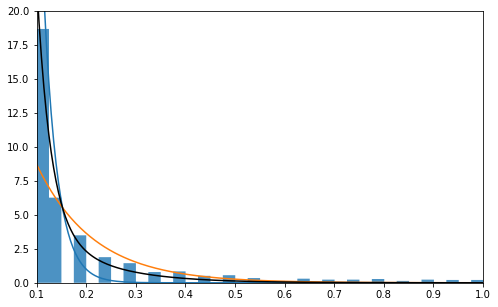

In [12]:
plt.figure(figsize=[8,5])
#plt.hist(times2, bins='fd', density=True, histtype='stepfilled', alpha=0.8)
plt.hist(times, bins='fd', density=True, histtype='stepfilled', alpha=0.8)
plt.plot(t, expon.pdf(t, loc, scale1), color='tab:blue')
plt.plot(t, expon.pdf(t, loc, popt[0]), color='tab:orange')
plt.plot(t, (expon.pdf(t, loc, scale1) + expon.pdf(t, loc, popt[0]))/2, color='k')
plt.xlim(min(times), 1)
plt.ylim(0, 20)
plt.show()

In [13]:
1/popt[0] - 0.49

8.232896076282337

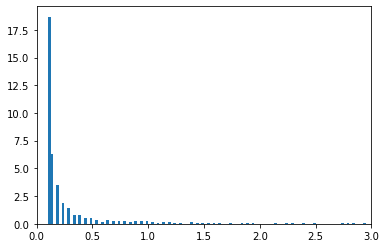

In [14]:
plt.hist(times, bins='fd', density=True)
plt.xlim(0, 3)
plt.show()